In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple.

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [7]:
import requests
requests.__version__

'2.26.0'

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1998eeb47e5aa5d05068826d5f3f9fd6


In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1998eeb47e5aa5d05068826d5f3f9fd6&q=Boston


In [11]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | porto belo
Processing Record 3 of Set 1 | upernavik
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | tottori
Processing Record 6 of Set 1 | nikolskoye
Processing Record 7 of Set 1 | manyana
Processing Record 8 of Set 1 | hobyo
Processing Record 9 of Set 1 | sulangan
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | bubaque
Processing Record 13 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | riyadh
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 19 of Set 1 | alice springs
Processing Record 20 of Set 1 | ponta delgada
Processing Record 21 of Set 1 | malajog
Processing Rec

Processing Record 38 of Set 4 | kaitangata
Processing Record 39 of Set 4 | sanming
Processing Record 40 of Set 4 | batagay-alyta
Processing Record 41 of Set 4 | tripoli
Processing Record 42 of Set 4 | maldonado
Processing Record 43 of Set 4 | rincon
Processing Record 44 of Set 4 | margate
Processing Record 45 of Set 4 | fairbanks
Processing Record 46 of Set 4 | singarayakonda
Processing Record 47 of Set 4 | paamiut
Processing Record 48 of Set 4 | xining
Processing Record 49 of Set 4 | requena
Processing Record 50 of Set 4 | severo-kurilsk
Processing Record 1 of Set 5 | mackenzie
Processing Record 2 of Set 5 | huambo
Processing Record 3 of Set 5 | mariental
Processing Record 4 of Set 5 | valley city
Processing Record 5 of Set 5 | evensk
Processing Record 6 of Set 5 | hami
Processing Record 7 of Set 5 | adrar
Processing Record 8 of Set 5 | nizwa
Processing Record 9 of Set 5 | chimoio
Processing Record 10 of Set 5 | pokhara
Processing Record 11 of Set 5 | metsavan
Processing Record 12 of 

Processing Record 33 of Set 8 | fukue
Processing Record 34 of Set 8 | abu samrah
Processing Record 35 of Set 8 | afsin
Processing Record 36 of Set 8 | chihuahua
Processing Record 37 of Set 8 | zambezi
Processing Record 38 of Set 8 | ruwi
Processing Record 39 of Set 8 | saint george
Processing Record 40 of Set 8 | torbay
Processing Record 41 of Set 8 | hirara
Processing Record 42 of Set 8 | bushehr
Processing Record 43 of Set 8 | silvi
Processing Record 44 of Set 8 | deputatskiy
Processing Record 45 of Set 8 | klaksvik
Processing Record 46 of Set 8 | port keats
Processing Record 47 of Set 8 | conde
Processing Record 48 of Set 8 | mikhaylovka
Processing Record 49 of Set 8 | samana
Processing Record 50 of Set 8 | nova petropolis
Processing Record 1 of Set 9 | chaman
Processing Record 2 of Set 9 | gamba
Processing Record 3 of Set 9 | luanda
Processing Record 4 of Set 9 | saint-augustin
Processing Record 5 of Set 9 | high prairie
Processing Record 6 of Set 9 | bella union
Processing Record 

City not found. Skipping...
Processing Record 20 of Set 12 | huangcun
Processing Record 21 of Set 12 | palmer
Processing Record 22 of Set 12 | kuryk
Processing Record 23 of Set 12 | matadi
Processing Record 24 of Set 12 | malanville
Processing Record 25 of Set 12 | tiksi
Processing Record 26 of Set 12 | jacobina
Processing Record 27 of Set 12 | lata
Processing Record 28 of Set 12 | lundazi
Processing Record 29 of Set 12 | visby
Processing Record 30 of Set 12 | bossangoa
Processing Record 31 of Set 12 | vilhena
Processing Record 32 of Set 12 | ikalamavony
Processing Record 33 of Set 12 | matara
Processing Record 34 of Set 12 | maraba
Processing Record 35 of Set 12 | havelock
Processing Record 36 of Set 12 | waingapu
Processing Record 37 of Set 12 | totness
Processing Record 38 of Set 12 | panlaitan
Processing Record 39 of Set 12 | veraval
Processing Record 40 of Set 12 | ranau
Processing Record 41 of Set 12 | panama city
Processing Record 42 of Set 12 | ancud
Processing Record 43 of Set

In [30]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,78.58,76,39,13.13,PF,2022-04-30 17:10:29
1,Porto Belo,-27.1578,-48.5531,71.26,68,100,2.30,BR,2022-04-30 17:11:02
2,Upernavik,72.7868,-56.1549,19.69,89,100,9.86,GL,2022-04-30 17:11:03
3,Port Elizabeth,-33.9180,25.5701,62.10,80,0,5.99,ZA,2022-04-30 17:11:04
4,Tottori,35.5000,134.2333,51.98,77,100,2.82,JP,2022-04-30 17:11:05
5,Nikolskoye,59.7035,30.7861,44.49,53,95,6.31,RU,2022-04-30 17:11:05
6,Manyana,-23.4000,21.7167,72.36,34,76,8.97,BW,2022-04-30 17:11:06
7,Hobyo,5.3505,48.5268,85.05,70,73,13.53,SO,2022-04-30 17:11:07
8,Sulangan,11.1373,123.7228,82.29,77,96,9.75,PH,2022-04-30 17:11:08
9,Punta Arenas,-53.1500,-70.9167,46.51,66,40,3.44,CL,2022-04-30 17:08:32


In [33]:
# Reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atuona,PF,2022-04-30 17:10:29,-9.8000,-139.0333,78.58,76,39,13.13
1,Porto Belo,BR,2022-04-30 17:11:02,-27.1578,-48.5531,71.26,68,100,2.30
2,Upernavik,GL,2022-04-30 17:11:03,72.7868,-56.1549,19.69,89,100,9.86
3,Port Elizabeth,ZA,2022-04-30 17:11:04,-33.9180,25.5701,62.10,80,0,5.99
4,Tottori,JP,2022-04-30 17:11:05,35.5000,134.2333,51.98,77,100,2.82
5,Nikolskoye,RU,2022-04-30 17:11:05,59.7035,30.7861,44.49,53,95,6.31
6,Manyana,BW,2022-04-30 17:11:06,-23.4000,21.7167,72.36,34,76,8.97
7,Hobyo,SO,2022-04-30 17:11:07,5.3505,48.5268,85.05,70,73,13.53
8,Sulangan,PH,2022-04-30 17:11:08,11.1373,123.7228,82.29,77,96,9.75
9,Punta Arenas,CL,2022-04-30 17:08:32,-53.1500,-70.9167,46.51,66,40,3.44


In [43]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City Data DataFrame into a CSV file
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [44]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [45]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1651341043.58934

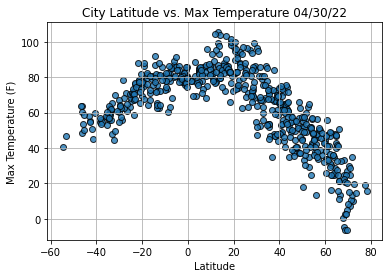

In [46]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

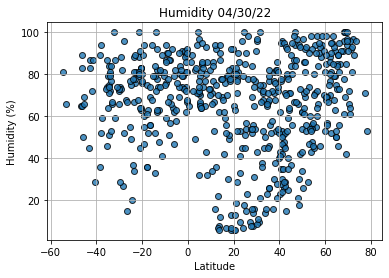

In [47]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

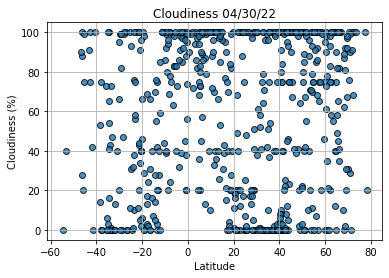

In [48]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

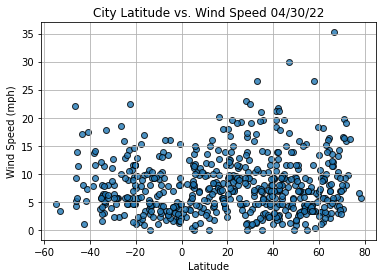

In [51]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()